# Chapter 7 - Moving Beyond Linearity

A linear model may not be able to represent a process properly and in that case we may need to add some flexibility to the it. One of the easiest way is to add polynomials to the model 

$$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + ... + \beta_d x_i^d + \epsilon_i$$

Models that have polynomials of the 2nd or 3rd are used often. The coefficients are computed in the same way as for the linear model, computing the least squares. A disatvantage is that a polynomial has a global effect on the full range of the predictor's domain. Other non-linear models, such as step functions and splines, allow to split the predictor domain so that different models are used in each subdomain.  

Here is a simple example of how we can fit a data set using a quadratic polynomial in R. Polynomials can form a set of orthonormal functions

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-5421.2466887,1.546580e+03,-3.505313,0.0006921695
"poly(x, 2, raw = TRUE)1",77.7075083,2.197402e+01,3.536336,0.0006240344
"poly(x, 2, raw = TRUE)2",-0.2784125,7.805107e-02,-3.567055,0.0005628472


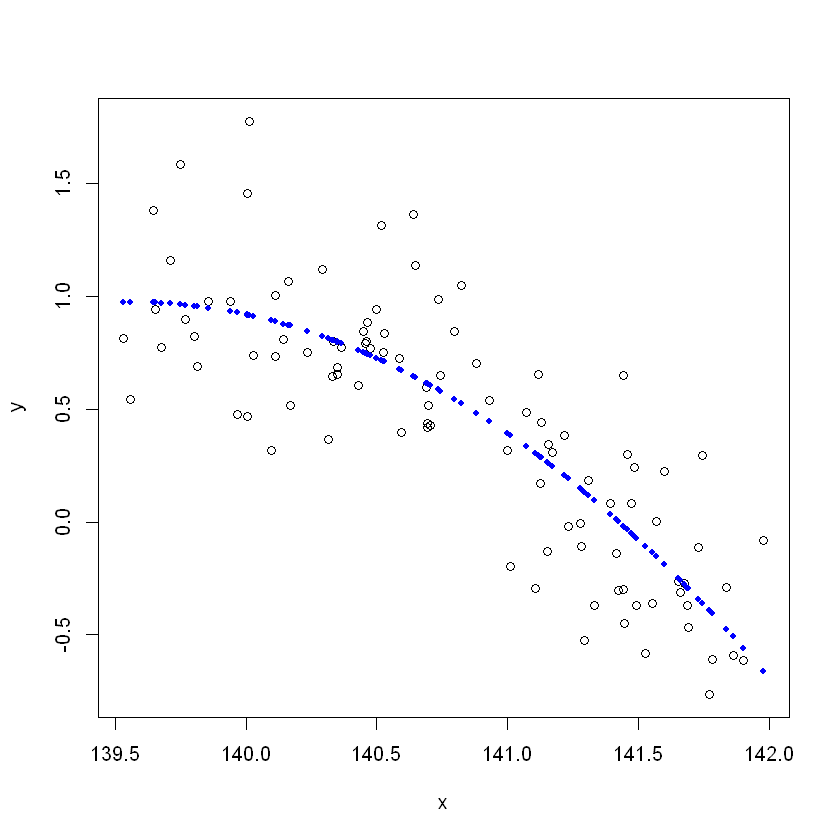

In [35]:
load("data/7.R.RData")
fit <- lm(y ~ poly(x, 2, raw = TRUE)) # raw = TRUE selects a base of x,x^2 instead of orthogonal polynomials  
coef(summary(fit))
plot(y ~ x) # plot the data
points(x, fitted(fit), col ='blue', pch=20) # plot the fit for each value of the predictor

### 7.8.1 Polynomial Regression and Step Functions
We will use the Wage data set for our examples about polynomial regression and step functions. We want to see how wage depends on the other variables.

In [36]:
library(ISLR)
dim(Wage); names(Wage)

[1] 3000   11

[1] "year"       "age"        "maritl"     "race"       "education" 
 [6] "region"     "jobclass"   "health"     "health_ins" "logwage"   
[11] "wage"

In [37]:
fit <- lm(wage ~ poly(age, 4), data = Wage) # fit of a 4-degree polynomial
coefficients(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


Now we plot the data and the fit for each value of the predictor. This is just a quick plot because usually we are interested in using the fit with a grid that may have different limits and number of points than the original predictor. 

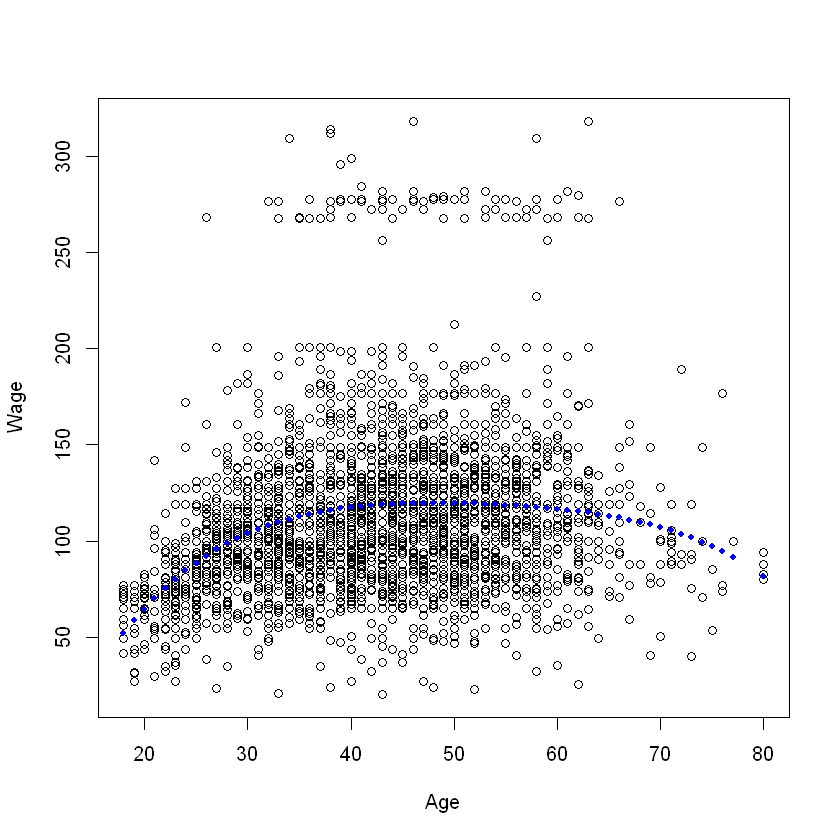

In [38]:
plot(Wage$wage ~ Wage$age, xlab = "Age", ylab = "Wage")
points(Wage$age, fitted(fit), col ='blue', pch=20)

Now we define a grid for the age variable. In this case we set the same limits as in the original data set and we use the default step, one, since the age is given as integers. Once we have the grid we use the predict() function and the fit to compute the response of the model for each point of the grid and finally we plot the fit with the standard error.

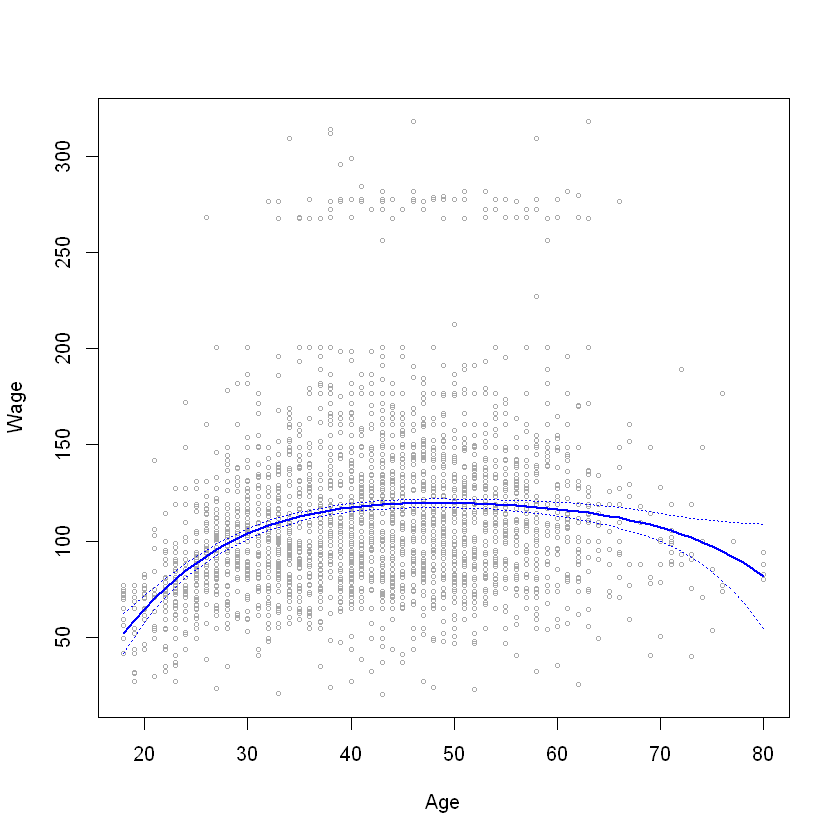

In [39]:
age_interval <- range(Wage$age) # lower and upper limits of the predictor
age.grid <- seq(from = age_interval[1], to = age_interval[2]) # builds the grid
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE) # compute the prediction for the grid points
#par(mfrow = c(1,2), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0)) # set the frame of the plot
plot(Wage$age, Wage$wage, xlim = age_interval, cex = 0.5, col = "darkgrey", xlab = "Age", ylab = "Wage") # plot the data points
lines(age.grid, preds$fit, lwd = 2, col = "blue") # adds the fit to the data points
se.bands <- cbind(preds$fit + 2 * preds$se.fit, preds$fit - 2 * preds$se.fit) # defines the curves of the standard error
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3) # adds the standard error

#### Analysis of Variance (ANOVA F-test)
We fit models of increasing degree polynomials and then we compare them to look for the simplest one that fits the data well enough. The models are nested, the one with higher degree containing those with lower degree. The anova() function tests the null hypothesis: the simpler model is sufficient to explain the data. A low p-value means that the test is significant and the null hyphotesis is false, that is, the simpler model cannot explain the data. A p-value not very small means that the null hypothesis is true and the simpler model can explain the data (see chapter 3 for an explanation of the ANOVA F-test).

In [40]:
fit1 <- lm(wage ~ age, data = Wage)
fit2 <- lm(wage ~ poly(age, 2), data = Wage)
fit3 <- lm(wage ~ poly(age, 3), data = Wage)
fit4 <- lm(wage ~ poly(age, 4), data = Wage)
fit5 <- lm(wage ~ poly(age, 5), data = Wage)
anova(fit1, fit2, fit3, fit4, fit5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


The last row is the result of the comparison between the 4-degree and the 5-degree models and being the p-value, Pr(>F), not very small it means that the null hypothesys is not false and the model with 4 degree can explain the data.

#### Logistic regression
From the plot we see that there are two distinct groups, those who earn more than 250K, and those who earn less than 200K. We may be interested in predicting to which group an individual can belong. We train the logit model 

$$log(\frac{Pr(y_i=1|x_i)}{1 - Pr(y_i=1|x_i)}) = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + ... + \beta_d x_i^d $$

In [41]:
fit <- glm(I(wage > 250) ~ poly(age, 4), data = Wage, family = "binomial")
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)

In order to get the probability of earning more than 250K we have to transform the logit

$$Pr(y_i = 1|x_i) = \frac{exp(\beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + ... + \beta_d x_i^d)}{1 + exp(\beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + ... + \beta_d x_i^d)}$$

and then compute the values of the fit for each x value in the grid with the standard errors.

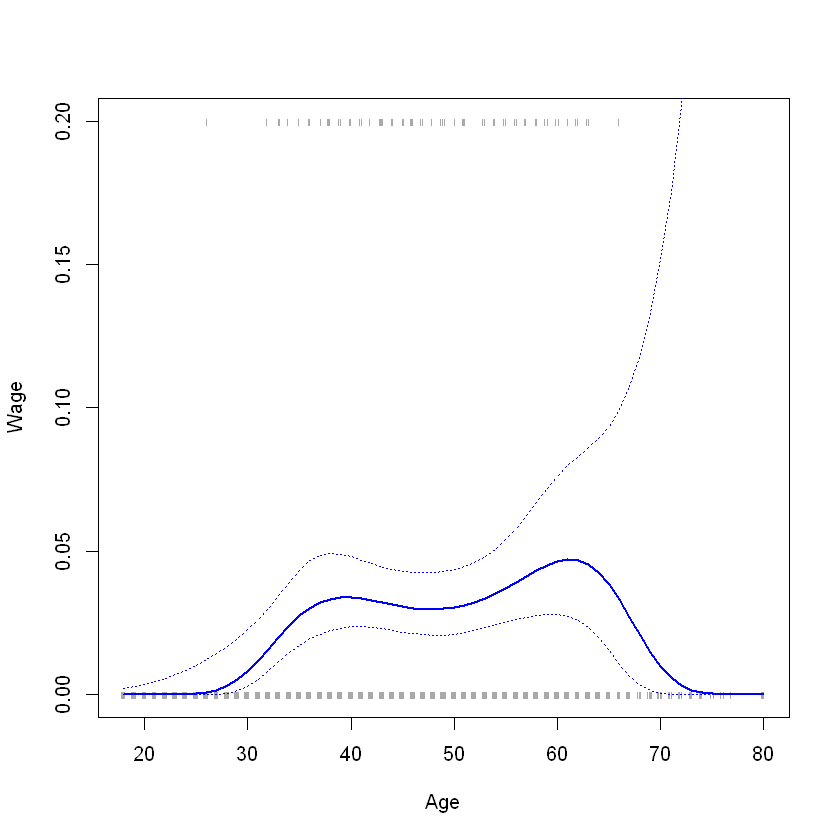

In [42]:
pfit <- exp(preds$fit) / (1 + exp(preds$fit))
se.bands.logit <- cbind(preds$fit + 2 * preds$se.fit, preds$fit - 2 * preds$se.fit)
se.bands <- exp(se.bands.logit) / (1 + exp(se.bands.logit))
plot(Wage$age, Wage$wage, xlim = age_interval, type = "n", ylim = c(0, 0.2), xlab = "Age", ylab = "Wage")
points(jitter(Wage$age), I((Wage$wage > 250) / 5), cex = 0.5, pch = "l", col = "darkgrey")
lines(age.grid, pfit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)